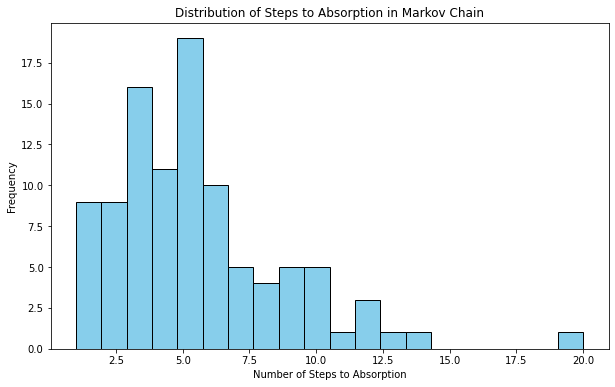

In [5]:
import numpy as np
import matplotlib.pyplot as plt

num_states = 7
absorbing_states = [5, 6]

P = np.array([
    [0.2, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0],
    [0.1, 0.2, 0.3, 0.2, 0.1, 0.1, 0.0],
    [0.0, 0.1, 0.2, 0.3, 0.2, 0.2, 0.0],
    [0.0, 0.0, 0.3, 0.2, 0.3, 0.2, 0.0],
    [0.0, 0.0, 0.1, 0.2, 0.4, 0.3, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
])

initial_state = np.zeros(num_states)
initial_state[0] = 1

num_realizations = 100
time_to_absorption = []

for _ in range(num_realizations):
    current_state = 0
    steps = 0
    
    while current_state not in absorbing_states:
        next_state = np.random.choice(num_states, p=P[current_state])
        current_state = next_state
        steps += 1
    
    time_to_absorption.append(steps)

plt.figure(figsize=(10, 6))
plt.hist(time_to_absorption, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Steps to Absorption in Markov Chain')
plt.xlabel('Number of Steps to Absorption')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_966/76037303.py:12: RuntimeWarning: invalid value encountered in divide
  experimental_transition_matrix = transition_counts / transition_counts.sum(axis=1, keepdims=True)


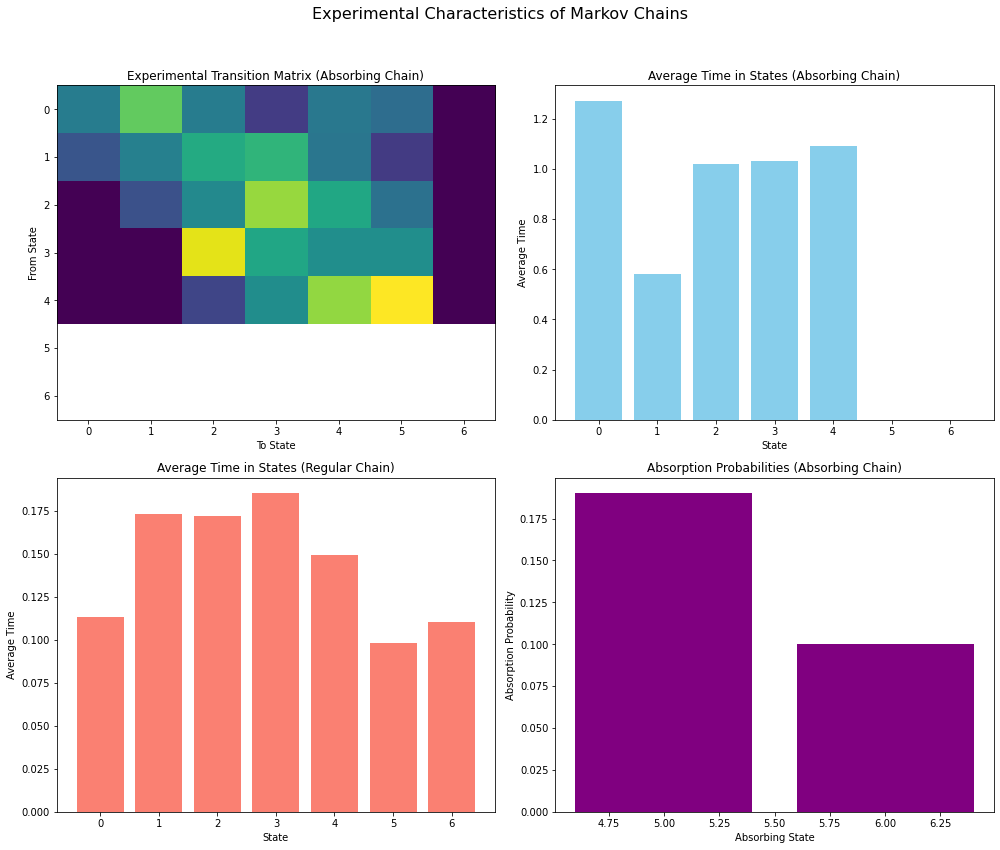

(array([[0.16535433, 0.2992126 , 0.16535433, 0.07086614, 0.15748031,
         0.14173228, 0.        ],
        [0.10344828, 0.17241379, 0.24137931, 0.25862069, 0.15517241,
         0.06896552, 0.        ],
        [0.        , 0.09803922, 0.18627451, 0.33333333, 0.23529412,
         0.14705882, 0.        ],
        [0.        , 0.        , 0.37864078, 0.23300971, 0.19417476,
         0.19417476, 0.        ],
        [0.        , 0.        , 0.08256881, 0.19266055, 0.33027523,
         0.39449541, 0.        ],
        [       nan,        nan,        nan,        nan,        nan,
                nan,        nan],
        [       nan,        nan,        nan,        nan,        nan,
                nan,        nan]]),
 array([1.27, 0.58, 1.02, 1.03, 1.09, 0.  , 0.  ]),
 5.3,
 [0.19, 0.1],
 array([0.113, 0.173, 0.172, 0.185, 0.149, 0.098, 0.11 ]))

In [7]:
from collections import defaultdict
import numpy as np

transition_counts = np.zeros((num_states, num_states))
for _ in range(num_realizations):
    current_state = 0
    while current_state not in absorbing_states:
        next_state = np.random.choice(num_states, p=P[current_state])
        transition_counts[current_state, next_state] += 1
        current_state = next_state

experimental_transition_matrix = transition_counts / transition_counts.sum(axis=1, keepdims=True)

state_visits = np.sum(transition_counts, axis=1)
average_time_in_states = state_visits / num_realizations

average_absorption_time = np.mean(time_to_absorption)

absorption_probabilities = [time_to_absorption.count(state) / num_realizations for state in absorbing_states]

P_regular = np.array([
    [0.1, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1],
    [0.2, 0.2, 0.2, 0.2, 0.1, 0.05, 0.05],
    [0.1, 0.1, 0.3, 0.2, 0.1, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.3, 0.2, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.2, 0.3, 0.1, 0.1],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.2],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3]
])

initial_state_regular = np.zeros(num_states)
initial_state_regular[0] = 1 

num_regular_realizations = 100
steps_per_realization = 10

state_visits_regular = np.zeros(num_states)

for _ in range(num_regular_realizations):
    current_state = 0
    for _ in range(steps_per_realization):
        next_state = np.random.choice(num_states, p=P_regular[current_state])
        state_visits_regular[next_state] += 1
        current_state = next_state

average_time_in_states_regular = state_visits_regular / (num_regular_realizations * steps_per_realization)

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Experimental Characteristics of Markov Chains', fontsize=16)

axs[0, 0].imshow(experimental_transition_matrix, cmap='viridis', aspect='auto')
axs[0, 0].set_title('Experimental Transition Matrix (Absorbing Chain)')
axs[0, 0].set_xlabel('To State')
axs[0, 0].set_ylabel('From State')

axs[0, 1].bar(range(num_states), average_time_in_states, color='skyblue')
axs[0, 1].set_title('Average Time in States (Absorbing Chain)')
axs[0, 1].set_xlabel('State')
axs[0, 1].set_ylabel('Average Time')

axs[1, 0].bar(range(num_states), average_time_in_states_regular, color='salmon')
axs[1, 0].set_title('Average Time in States (Regular Chain)')
axs[1, 0].set_xlabel('State')
axs[1, 0].set_ylabel('Average Time')

axs[1, 1].bar(absorbing_states, absorption_probabilities, color='purple')
axs[1, 1].set_title('Absorption Probabilities (Absorbing Chain)')
axs[1, 1].set_xlabel('Absorbing State')
axs[1, 1].set_ylabel('Absorption Probability')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

experimental_transition_matrix, average_time_in_states, average_absorption_time, absorption_probabilities, average_time_in_states_regular
